In [1]:
import numpy as np
import matplotlib.pyplot as plt

from astropy.modeling import models, fitting
from astropy.modeling.models import custom_model
from astropy.modeling import Fittable1DModel, Parameter

from astroquery.vizier import Vizier
import scipy.optimize
from astropy.io import fits
from astroquery.sdss import SDSS

## Models in Astropy

1) Gaussian1D

2) Trapezoid1D

3) Polynomial1D

4) Sine1D

5) Linear1D

## Fitters in Astropy

1) LevMarLSQFitter(): Levenberg-Marquardt algorithm and least squares statistic.

2) LinearLSQFitter(): A class performing a linear least square fitting.

3) SLSQPLSQFitter(): SLSQP optimization algorithm and least squares statistic.

4) SimplexLSQFitter(): Simplex algorithm and least squares statistic.

## Linear modeling for variable stars versus period time

In [2]:
catalog = Vizier.get_catalogs('J/A+A/605/A100')

This is a catalog of Type II Cepheids, which is a type of variable stars that pulsate with a period between 1 and 50 days.

In [3]:
period = np.array(catalog[0]['Period'])
log_period = np.log10(period)
k_mag = np.array(catalog[0]['__Ksmag_'])
k_mag_err = np.array(catalog[0]['e__Ksmag_'])

Text(0, 0.5, 'Ks')

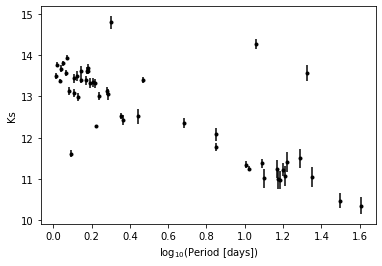

In [4]:
plt.errorbar(log_period, k_mag, k_mag_err, fmt='k.')
plt.xlabel(r'$\log_{10}$(Period [days])')
plt.ylabel('Ks')

### Linear1D

In [8]:
model = models.Linear1D()

In [7]:
fitter = fitting.LinearLSQFitter()

In [9]:
best_fit = fitter(model, log_period, k_mag, weights=1.0/k_mag_err**2)
print(best_fit)

Model: Linear1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
           slope            intercept     
    ------------------- ------------------
    -2.0981402575088963 13.418358846900365


Text(0, 0.5, 'Ks')

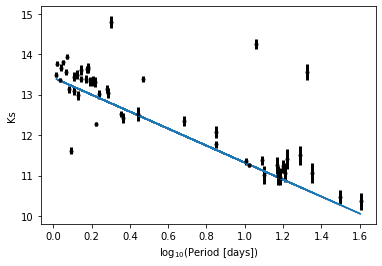

In [11]:
plt.errorbar(log_period, k_mag, k_mag_err, fmt='k.',linewidth=3)
plt.plot(log_period,best_fit(log_period))
plt.xlabel(r'$\log_{10}$(Period [days])')
plt.ylabel('Ks')

### Polynomial1D

In [13]:
model_poly = models. Polynomial1D(degree=1)
best_fit_poly = fitter(model_poly, log_period, k_mag, weights=1.0/k_mag_err**2)
print(best_fit_poly)

Model: Polynomial1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Degree: 1
Parameters:
            c0                  c1        
    ------------------ -------------------
    13.418358846900365 -2.0981402575089017


## Modeling 1

In [3]:
N = 100
x1 = np.linspace(0, 4, N)  # Makes an array from 0 to 4 of N elements
y1 = x1**3 - 6*x1**2 + 12*x1 - 9 + np.random.normal(0, 2, size=len(x1))

sigma = 1.5
y1_err = np.ones(N)*sigma

Text(0, 0.5, '$y_1$')

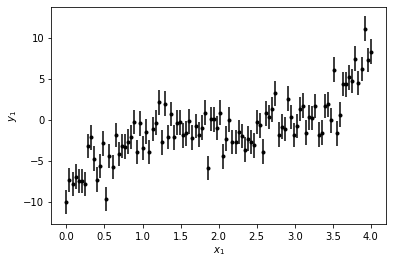

In [5]:
plt.errorbar(x1, y1, yerr=y1_err,fmt='k.')
plt.xlabel('$x_1$')
plt.ylabel('$y_1$')

In [7]:
model_poly = models.Polynomial1D(degree=3)
fitter_poly = fitting.LinearLSQFitter()
best_fit_poly = fitter_poly(model_poly, x1, y1, weights = 1.0/y1_err**2)
print(best_fit_poly)

Model: Polynomial1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Degree: 3
Parameters:
            c0                c1                 c2                 c3       
    ----------------- ------------------ ------------------ -----------------
    -9.30401239089363 13.394220873145494 -7.172418980506938 1.229486252098427


In [11]:
def calc_reduced_chi_square(fit, x, y, yerr, N, n_free):
    '''
    fit (array) values for the fit
    x,y,yerr (arrays) data
    N total number of points
    n_free number of parameters we are fitting
    '''
    return 1.0/(N-n_free)*sum(((fit - y)/yerr)**2)

In [10]:
reduced_chi_squared = calc_reduced_chi_square(best_fit_poly(x1), x1, y1, y1_err, N, 4)
print('Reduced Chi Squared with LinearLSQFitter:',reduced_chi_squared)

Reduced Chi Squared with LinearLSQFitter: 1.578344236168276


### Comparing two fitting

In [11]:
fitter_poly_2 = fitting.SimplexLSQFitter()
best_fit_poly_2 = fitter_poly_2(model_poly, x1, y1, weights = 1.0/y1_err**2)
print(best_fit_poly_2)

Model: Polynomial1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Degree: 3
Parameters:
             c0                 c1                  c2                  c3        
    ------------------- ------------------ ------------------- -------------------
    -0.2487746839293477 -0.747328458565621 -0.9330563928209814 0.40169917359884744


In [12]:
reduced_chi_squared = calc_reduced_chi_square(best_fit_poly_2(x1), x1, y1, y1_err, N, 4)
print('Reduced Chi Squared with SimplexLSQFitter:',reduced_chi_squared)

Reduced Chi Squared with SimplexLSQFitter: 4.329940004691334


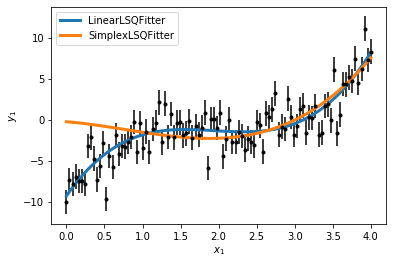

In [16]:
plt.errorbar(x1, y1, yerr=y1_err,fmt='k.')
plt.plot(x1,best_fit_poly(x1),linewidth=3,label='LinearLSQFitter')
plt.plot(x1,best_fit_poly_2(x1),linewidth=3,label='SimplexLSQFitter')
plt.xlabel('$x_1$')
plt.ylabel('$y_1$')
plt.legend()

## Modeling 2

In [21]:
mu, sigma, amplitude = 0.0, 10.0, 10.0
N2 = 100
x2 = np.linspace(-30, 30, N)
y2 = amplitude * np.exp(-(x2-mu)**2 / (2*sigma**2))+np.random.normal(0, 1,size=len(x2))
sigma = 1
y2_err = np.ones(N)*sigma

Text(0, 0.5, '$y_1$')

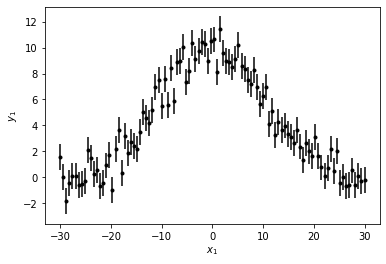

In [22]:
plt.errorbar(x2, y2, yerr=y2_err,fmt='k.')
plt.xlabel('$x_1$')
plt.ylabel('$y_1$')

In [25]:
model_gauss = models.Gaussian1D()
fitter_gauss = fitting.LevMarLSQFitter()
best_fit_gauss = fitter_gauss(model_gauss, x2, y2, weights=1/y2_err**2)
print(best_fit_gauss)

Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude              mean              stddev     
    ------------------ ------------------- -----------------
    10.102310240246329 -0.0369807692189561 9.990444999945868


Square of the errors for our fit parameters

In [26]:
cov_diag = np.diag(fitter_gauss.fit_info['param_cov'])
print(cov_diag)

[0.04750303 0.06190731 0.06209349]


In [28]:
reduced_chi_squared = calc_reduced_chi_square(best_fit_gauss(x2), x2, y2, y2_err, N2, 3)
print('Reduced Chi Squared using astropy.modeling: {}'.format(reduced_chi_squared))

Reduced Chi Squared using astropy.modeling: 0.9244369090013451


Text(0, 0.5, '$y_2$')

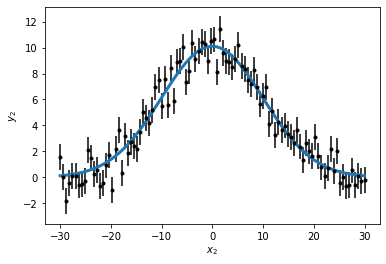

In [30]:
plt.errorbar(x2, y2, yerr=y2_err,fmt='k.')
plt.plot(x2,best_fit_gauss(x2),linewidth=3)

plt.xlabel('$x_2$')
plt.ylabel('$y_2$')


## Modeling 3

In [4]:
N3 = 100
x3 = np.linspace(0, 3, N3)
y3 = 5.0 * np.sin(2 * np.pi * x3)
y3 = np.array([y_point + np.random.normal(0, 1) for y_point in y3])
sigma = 1.5
y3_err = np.ones(N)*sigma

Text(0, 0.5, '$y_3$')

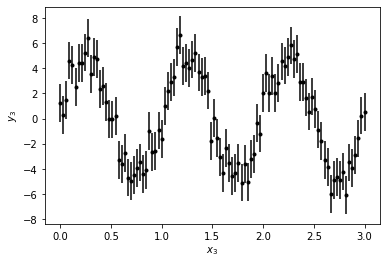

In [5]:
plt.errorbar(x3, y3, yerr=y3_err, fmt='k.')
plt.xlabel('$x_3$')
plt.ylabel('$y_3$')

In [8]:
model_sin = models.Sine1D()
fitter_sin = fitting.LevMarLSQFitter()
best_fit_sin = fitter_sin(model_sin, x3, y3, weights=1/y3_err**2)
print(best_fit_sin)

Model: Sine1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude         frequency             phase        
    ----------------- ------------------ --------------------
    4.908756521546204 1.0007092211634339 0.003620701993345171


Text(0, 0.5, '$y_3$')

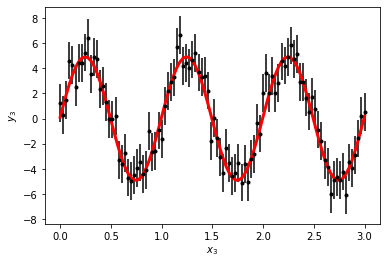

In [10]:
plt.errorbar(x3, y3, yerr=y3_err, fmt='k.')
plt.plot(x3,best_fit_sin(x3),color='red',linewidth=3)
plt.xlabel('$x_3$')
plt.ylabel('$y_3$')

In [12]:
reduced_chi_squared = calc_reduced_chi_square(best_fit_sin(x3), x3, y3, y3_err, N3, 3)
print('Reduced Chi Squared using sine1D: {}'.format(reduced_chi_squared))

Reduced Chi Squared using sine1D: 0.4124424408643484


# Example

### Fit an emission line in a stellar spectrum

In [2]:
spectrum = SDSS.get_spectra(plate=1349, fiberID=216, mjd=52797)[0]

C:\ProgramData\Anaconda3\lib\site-packages\astroquery\sdss\core.py:865: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  comments='#'))


In [3]:
spectrum[1].columns

ColDefs(
    name = 'flux'; format = 'E'
    name = 'loglam'; format = 'E'
    name = 'ivar'; format = 'E'
    name = 'and_mask'; format = 'J'
    name = 'or_mask'; format = 'J'
    name = 'wdisp'; format = 'E'
    name = 'sky'; format = 'E'
    name = 'model'; format = 'E'
)

In [4]:
flux = spectrum[1].data['flux']
lam = 10**(spectrum[1].data['loglam'])

In [5]:
units_flux = spectrum[0].header['bunit']
units_wavelength_full = spectrum[0].header['WAT1_001']

units_wavelength = units_wavelength_full[36:]

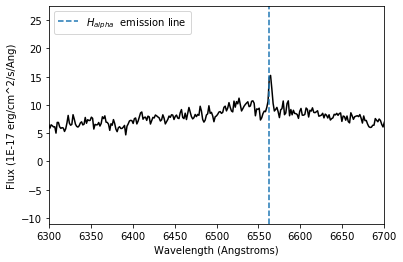

In [6]:
plt.plot(lam, flux, color='k')
plt.xlim(6300,6700)
plt.axvline(x=6563, linestyle='--',label='$H_{alpha}$  emission line')
plt.xlabel('Wavelength ({})'.format(units_wavelength))
plt.ylabel('Flux ({})'.format(units_flux))
plt.legend()

In [18]:
model = models.Polynomial1D(degree=4)
fitter = fitting.LevMarLSQFitter()
fit = fitter(model, lam, flux)

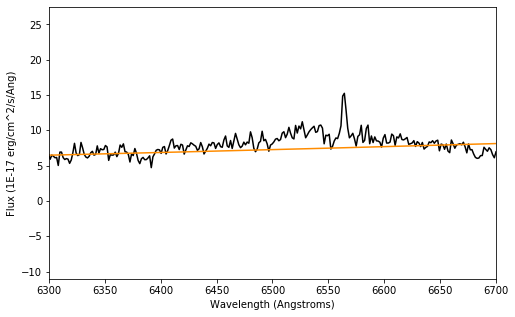

In [19]:
plt.figure(figsize=(8,5))
plt.plot(lam, flux, color='k')
plt.plot(lam, fit(lam), color='darkorange')
plt.xlim(6300,6700)
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Flux ({})'.format(units_flux))
plt.show()

#### Compound models

In [22]:
compound_model = models.Gaussian1D(1, 6563, 10) + models.Polynomial1D(degree=1)
fitter = fitting.LevMarLSQFitter()
compound_fit = fitter(compound_model, lam, flux)

In [29]:
print(compound_fit)

Model: CompoundModel1
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1]
Components: 
    [0]: <Gaussian1D(amplitude=1., mean=6563., stddev=10.)>

    [1]: <Polynomial1D(1, c0=0., c1=0.)>
Parameters:
       amplitude_0           mean_0       ...         c1_1        
    ------------------ ------------------ ... --------------------
    7.0208917442781855 6564.1363171493185 ... 0.003239952053005842


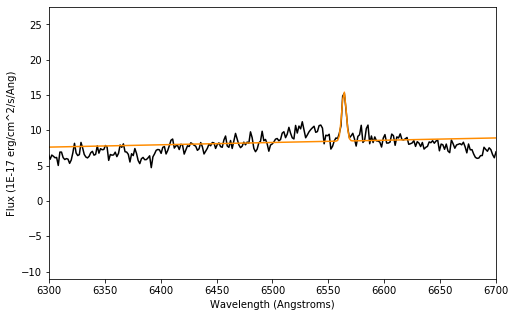

In [23]:
plt.figure(figsize=(8,5))
plt.plot(lam, flux, color='k')
plt.plot(lam, compound_fit(lam), color='darkorange')
plt.xlim(6300,6700)
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Flux ({})'.format(units_flux))
plt.show()

In [24]:
for x,y in zip(compound_fit.param_names, compound_fit.parameters):
    print(x,y)

amplitude_0 7.0208917442781855
mean_0 6564.1363171493185
stddev_0 1.9776147551996561
c0_1 -12.793356185541937
c1_1 0.003239952053005842


The mean value of the gaussian from our previous model indicates where the 
Hα line is. In our fit result, we can tell that it is a little off from 6563 Angstroms

In [26]:
compound_model_fixed = models.Gaussian1D(1, 6563, 10) + models.Polynomial1D(degree=1)
compound_model_fixed.mean_0.fixed = True
fitter = fitting.LevMarLSQFitter()
compound_fit_fixed = fitter(compound_model_fixed, lam, flux)

In [30]:
print(compound_fit_fixed)

Model: CompoundModel3
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1]
Components: 
    [0]: <Gaussian1D(amplitude=1., mean=6563., stddev=10.)>

    [1]: <Polynomial1D(1, c0=0., c1=0.)>
Parameters:
       amplitude_0    mean_0 ...         c0_1                 c1_1        
    ----------------- ------ ... ------------------- ---------------------
    1.532574710456973 6563.0 ... -12.791030002605133 0.0032374486280527266


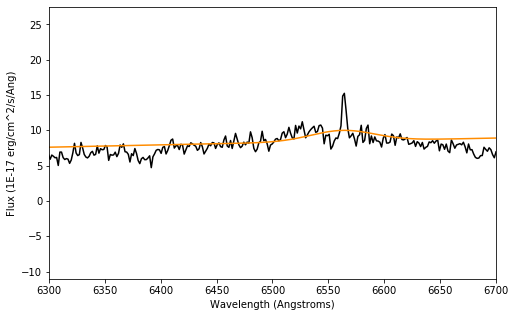

In [27]:
plt.figure(figsize=(8,5))
plt.plot(lam, flux, color='k')
plt.plot(lam, compound_fit_fixed(lam), color='darkorange')
plt.xlim(6300,6700)
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Flux ({})'.format(units_flux))
plt.show()

We did not get a good fit. But the mean value is where we want it

In [43]:
compound_model_bounded = models.Gaussian1D(1, 6563, 10) + models.Polynomial1D(degree=1)
delta = 0.1
compound_model_bounded.mean_0.max = 6563 + delta
compound_model_bounded.mean_0.min = 6563 - delta

fitter = fitting.LevMarLSQFitter()
compound_fit_bounded = fitter(compound_model_bounded, lam, flux)

In [44]:
print(compound_fit_bounded)

Model: CompoundModel9
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1]
Components: 
    [0]: <Gaussian1D(amplitude=1., mean=6563., stddev=10.)>

    [1]: <Polynomial1D(1, c0=0., c1=0.)>
Parameters:
       amplitude_0    mean_0 ...         c0_1                c1_1        
    ----------------- ------ ... ------------------- --------------------
    6.061158618144453 6563.1 ... -12.793348072476336 0.003239929039159574


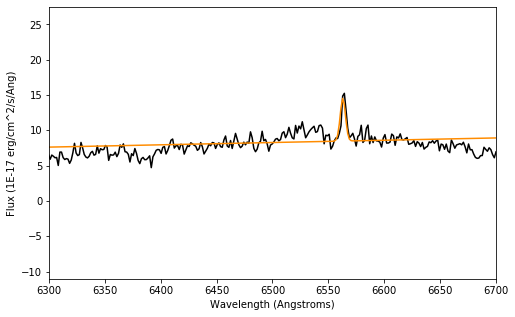

In [45]:
plt.figure(figsize=(8,5))
plt.plot(lam, flux, color='k')
plt.plot(lam, compound_fit_bounded(lam), color='darkorange')
plt.xlim(6300,6700)
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Flux ({})'.format(units_flux))
plt.show()

We got a better fit and the mean of the gaussian is closer to where we want it

## Custom model

When astropy.model dosn't provid a model, we need to make a custom model

### Basic custom model

In [7]:
x1 = np.linspace(0,10,100)

a = 3
b = -2
c = 0
y1 = a*np.exp(b*x1+c)
y1 += np.random.normal(0., 0.2, x1.shape)
y1_err = np.ones(x1.shape)*0.2

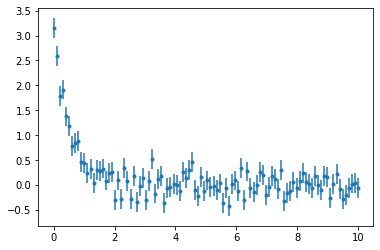

In [8]:
plt.errorbar(x1 , y1, yerr=y1_err, fmt='.')
plt.show()

In [9]:
@custom_model
def exponential(x, a=1., b=1., c=1.):
    '''
    f(x)=a*exp(b*x + c)
    '''
    return a*np.exp(b*x+c)

In [10]:
exp_model = exponential(1.,-1.,1.)
fitter = fitting.LevMarLSQFitter()
exp_fit = fitter(exp_model, x1, y1, weights = 1.0/y1_err**2)

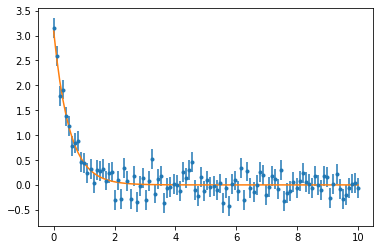

In [11]:
plt.errorbar(x1 , y1, yerr=y1_err, fmt='.')
plt.plot(x1, exp_fit(x1))
plt.show()

In [12]:
print(exp_fit)

Model: exponential
Inputs: ('x',)
Outputs: ('x',)
Model set size: 1
Parameters:
            a                   b                 c        
    ------------------ ------------------- ----------------
    0.9887918740325053 -1.9482522137659535 1.13924557865725


In [19]:
def calc_reduced_chi_square(fit, x, y, yerr, N, n_free):
    '''
    fit (array) values for the fit
    x,y,yerr (arrays) data
    N total number of points
    n_free number of parameters we are fitting
    '''
    return 1.0/(N-n_free)*sum(((fit - y)/yerr)**2)

In [14]:
calc_reduced_chi_square(exp_fit(x1), x1, y1, y1_err, len(x1), 3)

0.9287633373732089

## Full custom model

In [2]:
x2 = np.linspace(0,10,100)
a = 3
b = 2
c = 4
d = 1
y2 = a*np.sin(b*x2+c)+d
y2 += np.random.normal(0., 0.5, x2.shape)
y2_err = np.ones(x2.shape)*0.3

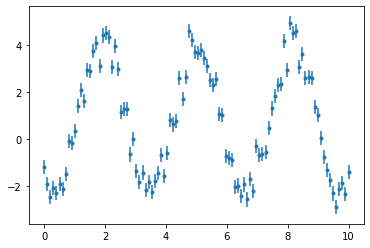

In [3]:
plt.errorbar(x2, y2, yerr=y2_err, fmt='.')
plt.show()

In [4]:
class SineNew(Fittable1DModel):
    a = Parameter(default=1.)
    b = Parameter(default=1.)
    c = Parameter(default=1.)
    d = Parameter(default=1.)

    @staticmethod
    def evaluate(x, a, b, c, d):
        return a*np.sin(b*x+c)+d

    @staticmethod
    
    def fit_deriv(x, a, b, c, d):
        d_a = np.sin(b*x+c)+d
        d_b = a*np.cos(b*x+c)*x
        d_c = a*np.sin(b*x+c)
        d_d = np.ones(x.shape)
        return [d_a, d_b, d_c, d_d]

In [5]:
sine_model = SineNew(a=4.,b=2.,c=4.,d=0.)
fitter = fitting.LevMarLSQFitter()
sine_fit = fitter(sine_model, x2, y2, weights = 1.0/y2_err**2)

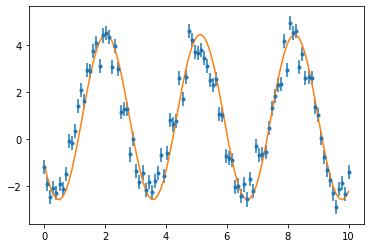

In [6]:
plt.errorbar(x2, y2, yerr=y2_err, fmt='.')
plt.plot(x2,sine_fit(x2))
plt.show()

In [15]:
x3 = np.linspace(-2,3,100)
y3 = x3**2* np.exp(-0.5 * (x3)**3 / 2**2)
y3 += np.random.normal(0., 0.5, x3.shape)
y3_err = np.ones(x3.shape)*0.5

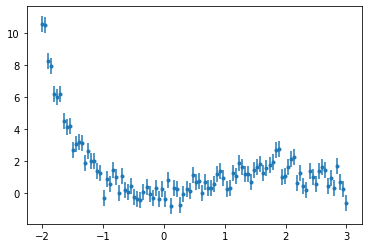

In [16]:
plt.errorbar(x3,y3,yerr=y3_err,fmt='.')
plt.show()

## custom compond models

In [17]:
model = exponential(1.,-1.,1.)+SineNew(a=4.,b=2.,c=4.,d=0.)
fitter = fitting.LevMarLSQFitter()
fit = fitter(model, x3, y3, weights = 1.0/y3_err**2)

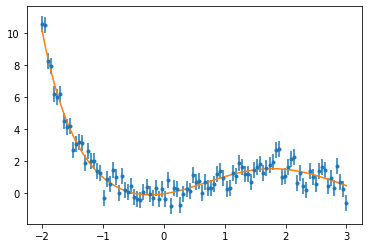

In [18]:
plt.errorbar(x3,y3,yerr=y3_err,fmt='.')
plt.plot(x3,fit(x3))
plt.show()

In [21]:
calc_reduced_chi_square(fit(x3), x3, y3, y3_err, len(x3), 3)

1.1485420873461987